# Map of correlations

In [14]:
import xarray as xr
from pathlib import Path

import intake
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

import numpy as np
import pandas as pd

#xr.set_options(display_style="text") # make it look better when posted online. Comment to get nicer representation of xarrays
import os

import re


In [2]:
# define paths
datapath = '/scratch/nf33/Healpix_data/'
model = 'UM'
zoom = 'z2'
fpath = f'{datapath}{model}/data.healpix.PT1H.{zoom}.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

clivi: atmosphere_mass_content_of_cloud_ice
clt: cloud_area_fraction
clwvi: atmosphere_mass_content_of_cloud_condensed_water
hflsd: surface_downward_latent_heat_flux
hfssd: surface_downward_sensible_heat_flux
huss: specific_humidity
pr: precipitation_flux
prs: solid_precipitation_flux
prw: atmosphere_mass_content_of_water_vapor
ps: surface_air_pressure
psl: air_pressure_at_mean_sea_level
rlds: surface_downwelling_longwave_flux_in_air
rldscs: surface_downwelling_longwave_flux_in_air_clear_sky
rlut: toa_outgoing_longwave_flux
rlutcs: toa_outgoing_longwave_flux_clear_sky
rsds: surface_downwelling_shortwave_flux_in_air
rsdscs: surface_downwelling_shortwave_flux_in_air_clear_sky
rsdt: toa_incoming_shortwave_flux
rsut: toa_outgoing_shortwave_flux
rsutcs: toa_outgoing_shortwave_flux_clear_sky
tas: air_temperature
ts: surface_temperature
uas: eastward_wind
vas: northward_wind


In [3]:
# define paths
datapath = '/scratch/nf33/Healpix_data/'
model = 'ICON'
zoom = 'z1'
fpath = f'{datapath}{model}/PT1H_inst_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

orog: surface altitude
pr: precipitation flux
psl: mean sea level pressure
rlut: toa outgoing longwave radiation
rsut: toa outgoing shortwave radiation
sftgif: cell area fraction occupied by land ice
sftlf: cell area fraction occupied by land including lakes
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m


In [4]:
# read UM z2
ds_2 = xr.open_zarr(fpath)
ds_2

<xarray.Dataset> Size: 14MB
Dimensions:  (crs: 1, cell: 48, time: 10200)
Coordinates:
  * crs      (crs) float32 4B nan
  * time     (time) datetime64[ns] 82kB 2020-01-01T01:00:00 ... 2021-03-01
Dimensions without coordinates: cell
Data variables:
    orog     (cell) float32 192B dask.array<chunksize=(48,), meta=np.ndarray>
    pr       (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    psl      (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    rlut     (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    rsut     (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    sftgif   (cell) float32 192B dask.array<chunksize=(48,), meta=np.ndarray>
    sftlf    (cell) float32 192B dask.array<chunksize=(48,), meta=np.ndarray>
    ts       (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    uas      (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
    vas      (time, cell) float32 2MB dask.array<chunksize=(4, 48), meta=np.ndarray>
Attributes:
    hiopy::parent:  PT1H_point_z2_atm

In [5]:
ds_2.pr

<xarray.DataArray 'pr' (time: 10200, cell: 48)> Size: 2MB
dask.array<open_dataset-pr, shape=(10200, 48), dtype=float32, chunksize=(4, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 82kB 2020-01-01T01:00:00 ... 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  point
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       pr
    units:               kg m-2 s-1
    short_name:          
    long_name:           precipitation flux

In [6]:
ds_2.time

<xarray.DataArray 'time' (time: 10200)> Size: 82kB
array(['2020-01-01T01:00:00.000000000', '2020-01-01T02:00:00.000000000',
       '2020-01-01T03:00:00.000000000', ..., '2021-02-28T22:00:00.000000000',
       '2021-02-28T23:00:00.000000000', '2021-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 82kB 2020-01-01T01:00:00 ... 2021-03-01
Attributes:
    axis:     T

In [7]:
ds_2.pr.mean("cell").values[:40]

array([9.9054341e-06, 1.5905764e-05, 2.0837708e-05, 2.5206818e-05,
       2.8552944e-05, 3.1004700e-05, 3.2434153e-05, 3.3023480e-05,
       3.3359549e-05, 3.4277455e-05, 3.5615838e-05, 3.5845991e-05,
       3.5568130e-05, 3.5420380e-05, 3.5863002e-05, 3.6761601e-05,
       3.7033602e-05, 3.6655525e-05, 3.5824585e-05, 3.5024223e-05,
       3.3652610e-05, 3.2434702e-05, 3.1345709e-05, 3.0770385e-05,
       3.0570558e-05, 3.0473157e-05, 3.0552877e-05, 3.0904321e-05,
       3.1377036e-05, 3.1645108e-05, 3.1631953e-05, 3.1599655e-05,
       3.1601056e-05, 3.2179687e-05, 3.3075317e-05, 3.3574815e-05,
       3.3947865e-05, 3.4330467e-05, 3.5305642e-05, 3.5919464e-05],
      dtype=float32)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


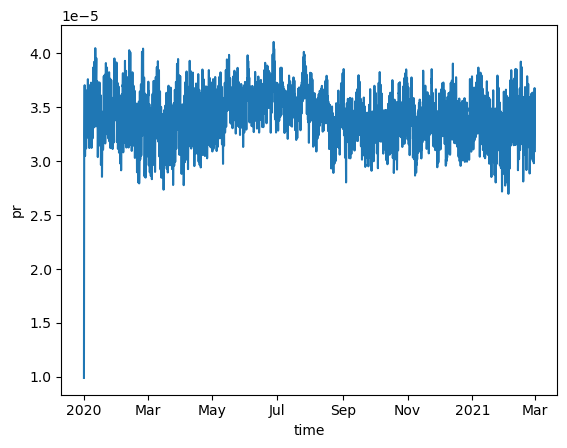

In [8]:
ds_2.pr.mean("cell").plot()

In [9]:
data = ds_2.pr.isel(time=20)

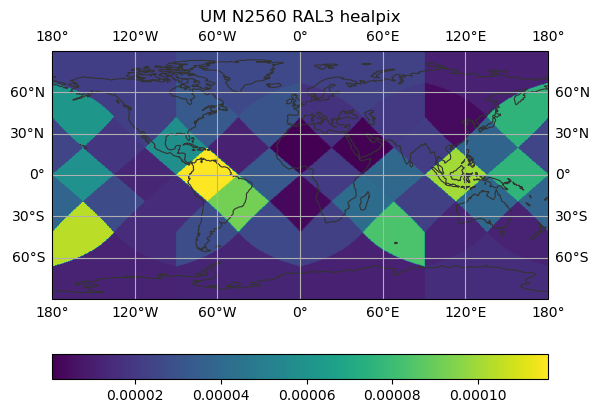

In [10]:
# Plotting lat/lon values over the grid
projection=ccrs.PlateCarree(central_longitude=0.0)

ax = egh.create_geoaxis(add_coastlines=True,projection=projection)
im = egh.healpix_show(data.values, ax=ax, add_coastlines=True)
ax.set_title(f'UM N2560 RAL3 healpix')
ax.gridlines(draw_labels=True)
fig=ax.get_figure()
fig.colorbar(im,orientation='horizontal')

In [2]:
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z10'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')


clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

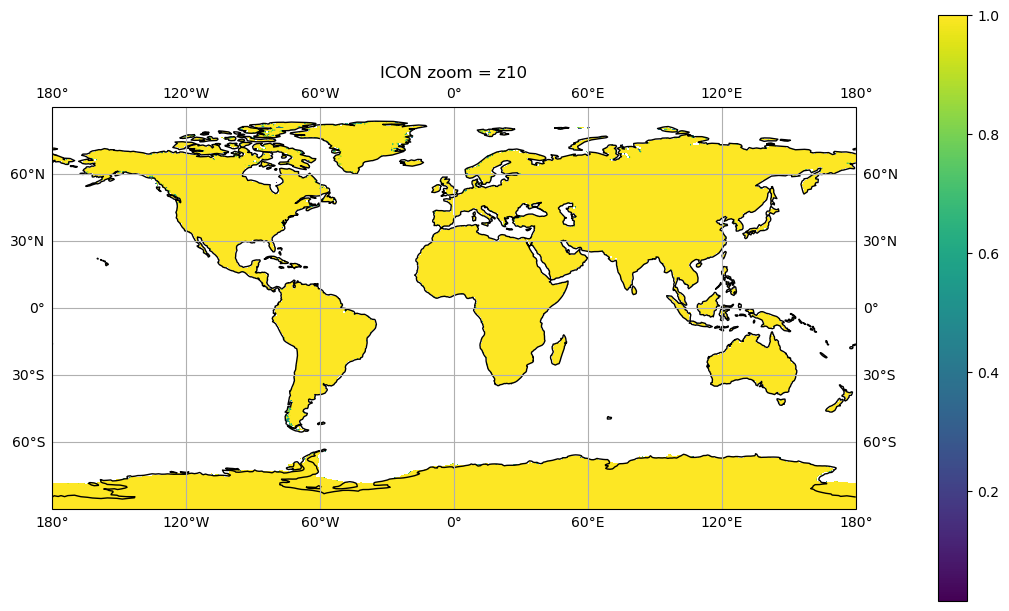

In [3]:
# choose a variable to plot
da = ds['sftlf']

# test plot some data
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

data = da
ax.set_global()
im = egh.healpix_show(data.values,ax=ax)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

In [4]:
#calculate evapotranspiration 
evapo = ds['hflsd']/(2.501*1000000)


In [5]:
ds['pr']

<xarray.DataArray 'pr' (time: 425, cell: 12582912)> Size: 21GB
dask.array<open_dataset-pr, shape=(425, 12582912), dtype=float32, chunksize=(4, 262144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  mean
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       pr
    units:               kg m-2 s-1
    short_name:          
    long_name:           precipitation flux

In [6]:
icon_pr = ds['pr'].mean('time')* 86400

In [7]:
icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'], np.NaN)
icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), (ds['hflsd']*-1), np.NaN)
icon_y2  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['hfssd'], np.NaN)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds['pr'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds['pr'], icon_y2, dim='time'), np.NaN) #.values

In [8]:
icon_corr_lh_pr.values

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/pub

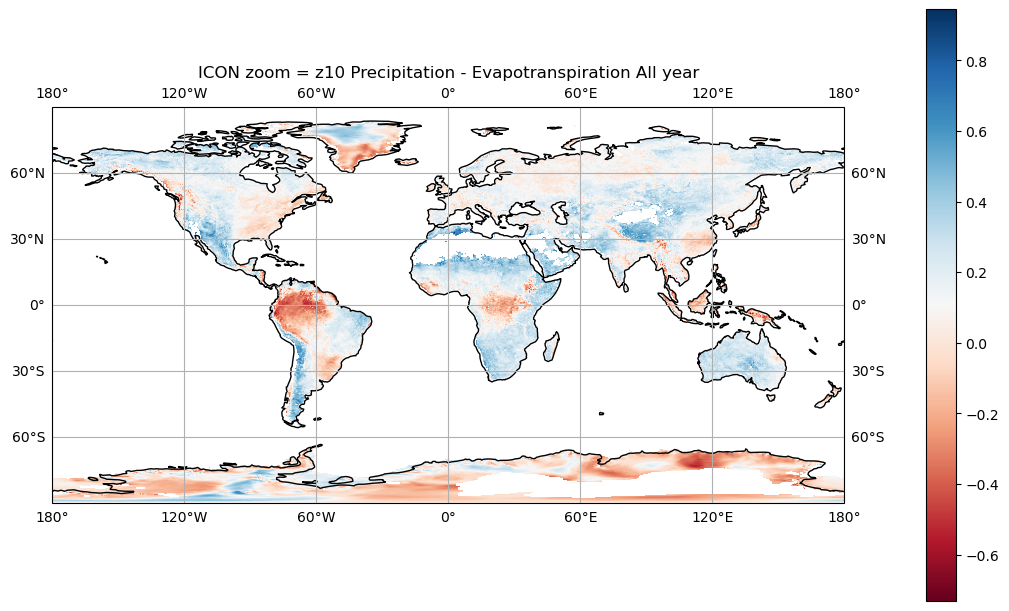

In [9]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = {zoom} Precipitation - Evapotranspiration All year')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

In [10]:
ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))

In [11]:
ds_jja['mrso']

<xarray.DataArray 'mrso' (time: 92, soil_level: 5, cell: 12582912)> Size: 23GB
dask.array<getitem, shape=(92, 5, 12582912), dtype=float32, chunksize=(4, 1, 262144), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 40B 0 0 0 2 6
  * time        (time) datetime64[ns] 736B 2020-06-01 2020-06-02 ... 2020-08-31
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  mean
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       wtr_soil_sl
    units:               m
    short_name:          
    long_name:           Water content of soil layers

In [23]:
icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_jja['mrso'].isel(soil_level=0), np.NaN)
icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9),  (ds_jja['hflsd']*-1), np.NaN)
icon_y2  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_jja['hfssd'], np.NaN)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_y2, dim='time'), np.NaN) #.values
icon_corr_sm_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_jja['pr'], icon_smi, dim='time'), np.NaN) #.values

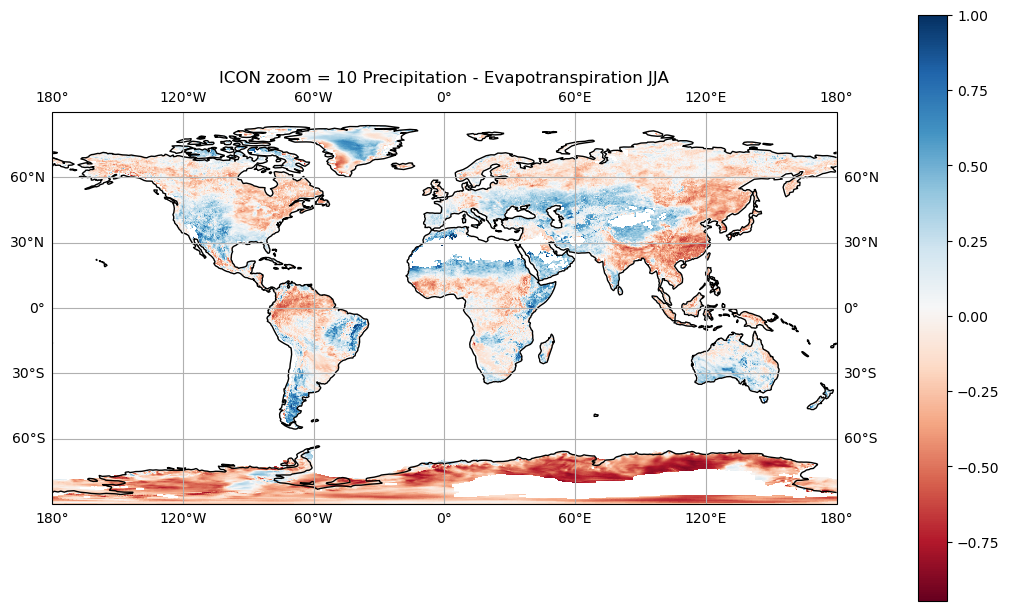

In [24]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = 10 Precipitation - Evapotranspiration JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

output_path = "/home/131/wl0799/hackathon-2025-australia-node/images/correlation_PP_evap_JJA.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

In [20]:
icon_corr_sm_pr.values

array([       nan,        nan, 0.35582423, ...,        nan, 0.60467863,
              nan], dtype=float32)

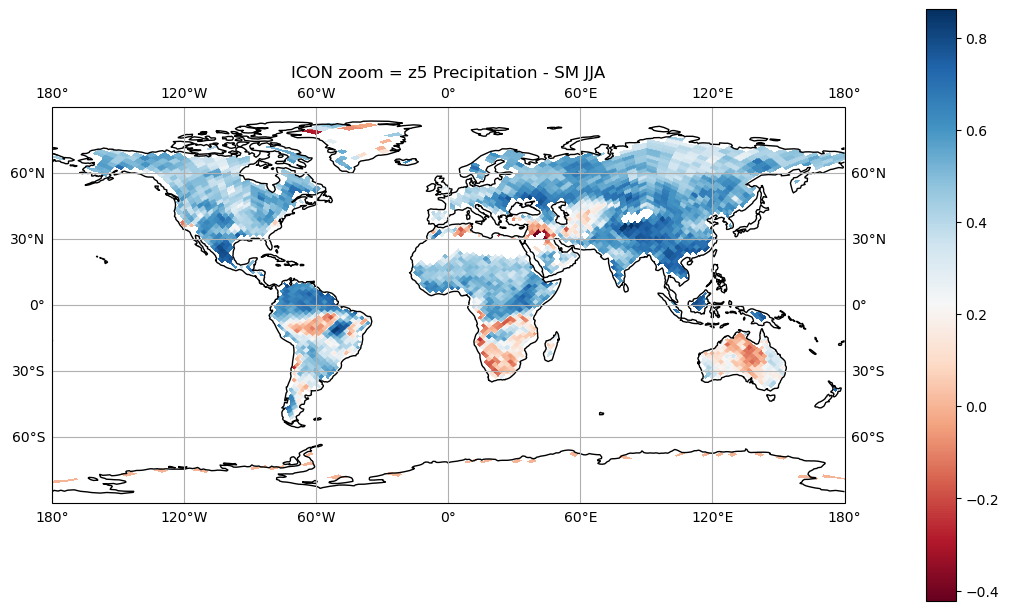

In [24]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_sm_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = 10 Precipitation - SM JJA')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()

In [ ]:
icon_corr_lh_smi  = xr.where((icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake'] < 0.1), 
                             xr.corr(dataICON['smi'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_smi  = xr.where((icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake'] < 0.1), 
                             xr.corr(dataICON['smi'], icon_y2, dim='time'), np.NaN).values
icon_corr_pr_smi  = xr.where((icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake'] < 0.1), 
                             xr.corr(dataICON['smi'], dataICON['pr'], dim='time'), np.NaN).values
icon_corr_pr_smi  = xr.where((icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake'] < 0.1), 
                             xr.corr(dataICON['smi'], dataICON['pr'], dim='time'), np.NaN) #.values
icon_corr_lh_sl0  = xr.where((icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake'] < 0.1), 
                             xr.corr(dataICON['hydro_w_soil_sl_box'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_pr_sl0  = xr.where((icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake'] < 0.1), 
                             xr.corr(dataICON['hydro_w_soil_sl_box'], dataICON['pr'], dim='time'), np.NaN)#.values


In [ ]:
# double check of correlations

In [ ]:
#apply second condition with SD to mask grid cells

In [ ]:
#ponderize average  of soil levels 

In [ ]:
# calculate time serie of specific regions 

In [ ]:
# tigramite analysis to analysis feedback between PP, SM, EV

In [ ]:
# partial correlation analysis

In [25]:
ds_djf= ds.sel(time=ds['time'].dt.month.isin([12, 13, 14]))


In [26]:
icon_smi = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_djf['mrso'].isel(soil_level=0), np.NaN)
icon_y1  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9),  (ds_djf['hflsd']*-1), np.NaN)
icon_y2  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds_djf['hfssd'], np.NaN)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_djf['pr'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_djf['pr'], icon_y2, dim='time'), np.NaN) #.values
icon_corr_sm_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds_djf['pr'], icon_smi, dim='time'), np.NaN) #.values

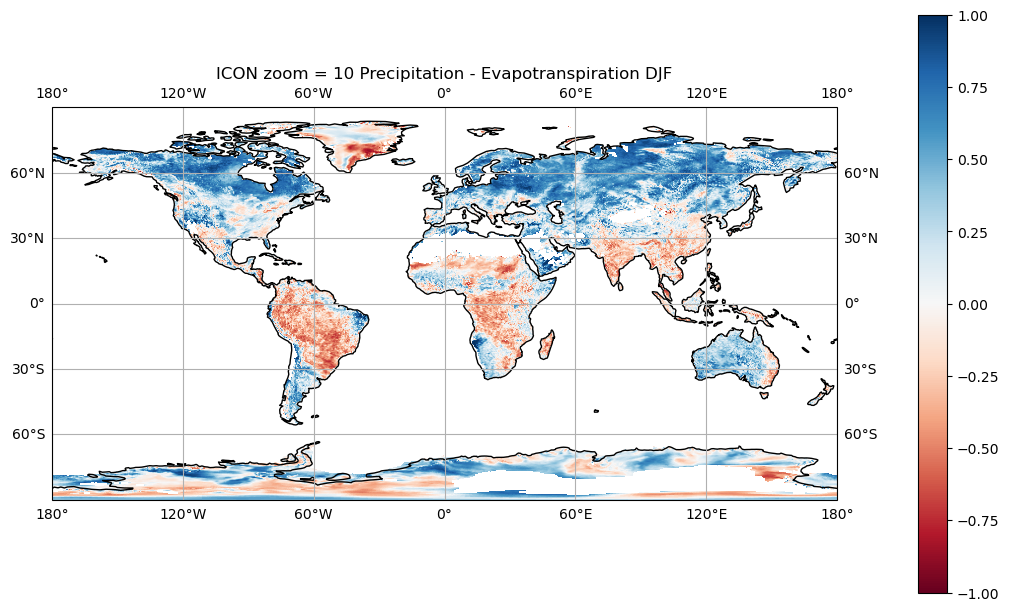

In [27]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

#data = da.isel(time=20, soil_level=1)

ax.set_global()
im = egh.healpix_show(icon_corr_lh_pr.values,ax=ax,cmap='RdBu')
ax.set_title(f'ICON zoom = 10 Precipitation - Evapotranspiration DJF')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

output_path = "/home/131/wl0799/hackathon-2025-australia-node/images/correlation_PP_evap_DJF.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

In [2]:
data_cmip = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/MPI-M/ICON-ESM-LR/historical/r5i1p1f1/Amon/pr/gn/v20210215/pr_Amon_ICON-ESM-LR_historical_r5i1p1f1_gn_197001-197912.nc')
data_cmip

<xarray.Dataset> Size: 11MB
Dimensions:             (time: 120, bnds: 2, i: 20480, vertices: 3)
Coordinates:
  * time                (time) datetime64[ns] 960B 1970-01-16T12:00:00 ... 19...
  * i                   (i) int32 82kB 0 1 2 3 4 ... 20476 20477 20478 20479
    latitude            (i) float64 164kB ...
    longitude           (i) float64 164kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 2kB ...
    vertices_latitude   (i, vertices) float64 492kB ...
    vertices_longitude  (i, vertices) float64 492kB ...
    pr                  (time, i) float32 10MB ...
Attributes: (12/50)
    CDI_grid_type:          unstructured
    CDO:                    Climate Data Operators version 2.0.0rc5 (https://...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  ICON-ESM-LR output prepared for CMIP6
    variable_id:            pr
    variant_label:          r5i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/24c616ad-dec7-4603-a5e0-e36c6bf0705f

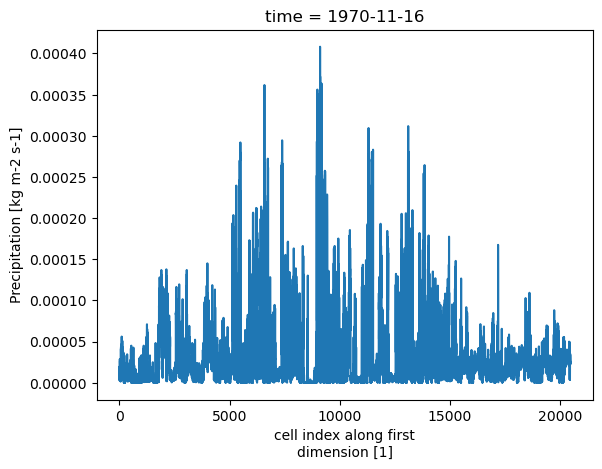

In [3]:
data_cmip['pr'].isel(time=10).plot()

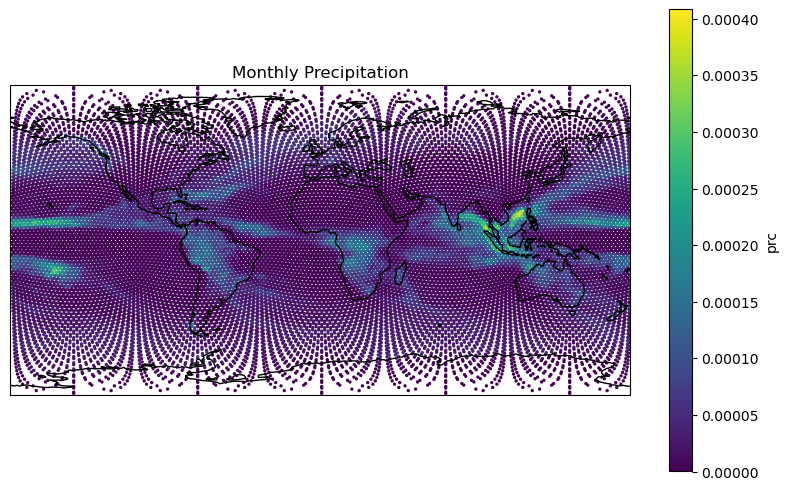

In [4]:
prc = data_cmip['pr'].isel(time=10)
lon = data_cmip['longitude']
lat = data_cmip['latitude']

# Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(lon, lat, c=prc, cmap='viridis', s=2, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='prc')
ax.coastlines()
ax.set_title('Monthly Precipitation')
plt.show()

In [5]:
#extract soil moisture 
mrso_cmip = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/MPI-M/ICON-ESM-LR/historical/r1i1p1f1/Eday/mrsol/gn/v20210215/mrsol_Eday_ICON-ESM-LR_historical_r1i1p1f1_gn_18500101-18591231.nc')
mrso_cmip

<xarray.Dataset> Size: 1GB
Dimensions:             (time: 3652, bnds: 2, depth: 5, i: 20480, vertices: 3)
Coordinates:
  * time                (time) datetime64[ns] 29kB 1850-01-01T12:00:00 ... 18...
  * depth               (depth) float64 40B 0.0325 0.192 0.7755 2.683 6.984
  * i                   (i) int32 82kB 0 1 2 3 4 ... 20476 20477 20478 20479
    latitude            (i) float64 164kB ...
    longitude           (i) float64 164kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 58kB ...
    depth_bnds          (depth, bnds) float64 80B ...
    vertices_latitude   (i, vertices) float64 492kB ...
    vertices_longitude  (i, vertices) float64 492kB ...
    mrsol               (time, depth, i) float32 1GB ...
Attributes: (12/50)
    CDI_grid_type:          unstructured
    CDO:                    Climate Data Operators version 2.0.0rc5 (https://...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  ICON-ESM-LR output prepared for CMIP6
    variable_id:            mrsol
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/462bb74a-ea8e-4b24-993e-9bc8a179a4e1

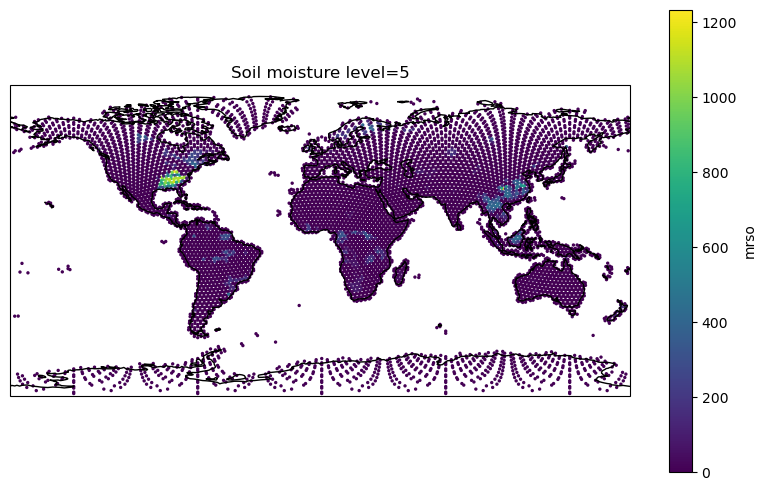

In [6]:
prc = mrso_cmip['mrsol'].isel(time=10,depth=4)
lon = mrso_cmip['longitude']
lat = mrso_cmip['latitude']

# Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(lon, lat, c=prc, cmap='viridis', s=2, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='mrso')
ax.coastlines()
ax.set_title('Soil moisture level=5')
plt.show()

In [7]:
#extract soil moisture 
daily_PP_cmip = xr.open_dataset('/scratch/nf33/cmip/pr_day_ICON-ESM-LR_historical_r1i1p1f1_gn_20100101-20141231.nc')
daily_PP_cmip

<xarray.Dataset> Size: 151MB
Dimensions:             (time: 1826, bnds: 2, i: 20480, vertices: 3)
Coordinates:
  * time                (time) datetime64[ns] 15kB 2010-01-01T12:00:00 ... 20...
  * i                   (i) int32 82kB 0 1 2 3 4 ... 20476 20477 20478 20479
    latitude            (i) float64 164kB ...
    longitude           (i) float64 164kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 29kB ...
    vertices_latitude   (i, vertices) float64 492kB ...
    vertices_longitude  (i, vertices) float64 492kB ...
    pr                  (time, i) float32 150MB ...
Attributes: (12/50)
    CDI_grid_type:          unstructured
    CDO:                    Climate Data Operators version 2.0.0rc5 (https://...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  ICON-ESM-LR output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/74fd89f9-4983-4b04-b669-9cf8fec089a4

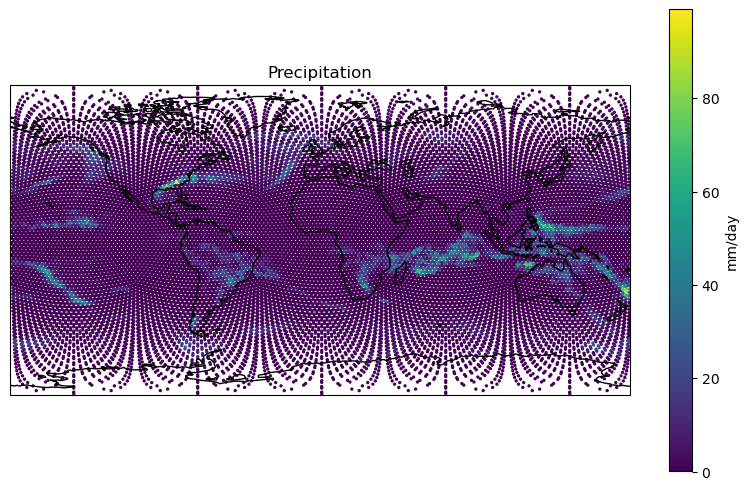

In [11]:
prc = daily_PP_cmip['pr'].isel(time=10)* 86400
lon = daily_PP_cmip['longitude']
lat = daily_PP_cmip['latitude']

# Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(lon, lat, c=prc, cmap='viridis', s=2, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='mm/day')
ax.coastlines()
ax.set_title('Precipitation')
plt.show()

In [17]:


# Set your folder path
folder_path = "/scratch/nf33/cmip"

# List all .nc files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith(".nc")]

# Filter files based on year in the name
selected_files = []
for f in all_files:
    match = re.search(r'(\d{8})-(\d{8})', f)
    if match:
        start_year = int(match.group(1)[:4])
        end_year = int(match.group(2)[:4])
        if start_year >= 1950 and end_year <= 2014:
            selected_files.append(os.path.join(folder_path, f))

# Open multiple files using xarray
day_pp = xr.open_mfdataset(selected_files)

# Optional: check the dataset
print(ds)


<xarray.Dataset> Size: 25GB
Dimensions:             (time: 23741, bnds: 2, i: 20480, vertices: 3)
Coordinates:
  * time                (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2...
  * i                   (i) int32 82kB 0 1 2 3 4 ... 20476 20477 20478 20479
    latitude            (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
    longitude           (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 380kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    vertices_latitude   (time, i, vertices) float64 12GB dask.array<chunksize=(3652, 20480, 3), meta=np.ndarray>
    vertices_longitude  (time, i, vertices) float64 12GB dask.array<chunksize=(3652, 20480, 3), meta=np.ndarray>
    pr                  (time, i) float32 2GB dask.array<chunksize=(1, 20480), meta=np.ndarray>
Attributes: (12/50)
    CDI_grid_type:          unstructured
 

In [27]:
day_pp['latitude'].values

array([ 52.60663398,  53.86758051,  51.96583332, ..., -46.73186576,
       -46.804689  , -44.82338726])

In [18]:
day_pp

<xarray.Dataset> Size: 25GB
Dimensions:             (time: 23741, bnds: 2, i: 20480, vertices: 3)
Coordinates:
  * time                (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2...
  * i                   (i) int32 82kB 0 1 2 3 4 ... 20476 20477 20478 20479
    latitude            (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
    longitude           (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 380kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    vertices_latitude   (time, i, vertices) float64 12GB dask.array<chunksize=(3652, 20480, 3), meta=np.ndarray>
    vertices_longitude  (time, i, vertices) float64 12GB dask.array<chunksize=(3652, 20480, 3), meta=np.ndarray>
    pr                  (time, i) float32 2GB dask.array<chunksize=(1, 20480), meta=np.ndarray>
Attributes: (12/50)
    CDI_grid_type:          unstructured
    CDO:                    Climate Data Operators version 2.0.0rc5 (https://...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    title:                  ICON-ESM-LR output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/a2c27e3e-1210-4422-ab52-184ba13d0883

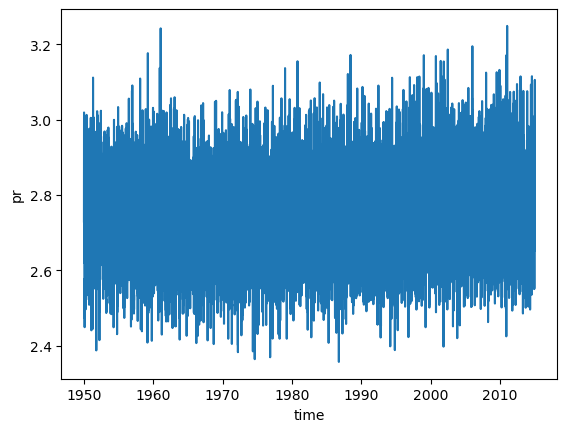

In [24]:
(day_pp['pr'].mean(dim='i')*86400).plot()

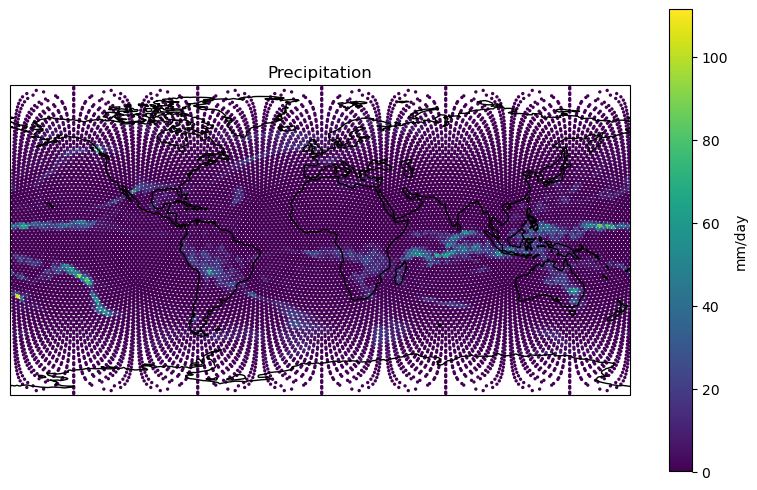

In [29]:
prc = day_pp['pr'].isel(time=10)* 86400
lon = day_pp['longitude']
lat = day_pp['latitude']

# Plot with Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(lon, lat, c=prc, cmap='viridis', s=2, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='mm/day')
ax.coastlines()
ax.set_title('Precipitation')
plt.show()

In [ ]:
#extract soil moisture 
mrso_cmip = xr.open_dataset('/g/data/oi10/replicas/CMIP6/CMIP/MPI-M/ICON-ESM-LR/historical/r1i1p1f1/Eday/mrsol/gn/v20210215/mrsol_Eday_ICON-ESM-LR_historical_r1i1p1f1_gn_18500101-18591231.nc')
mrso_cmip

In [30]:
# Set your folder path
folder_path = "/g/data/oi10/replicas/CMIP6/CMIP/MPI-M/ICON-ESM-LR/historical/r1i1p1f1/Eday/mrsol/gn/v20210215"

# List all .nc files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith(".nc")]

# Filter files based on year in the name
selected_files = []
for f in all_files:
    match = re.search(r'(\d{8})-(\d{8})', f)
    if match:
        start_year = int(match.group(1)[:4])
        end_year = int(match.group(2)[:4])
        if start_year >= 1950 and end_year <= 2014:
            selected_files.append(os.path.join(folder_path, f))

# Open multiple files using xarray
day_mrso = xr.open_mfdataset(selected_files)

# Optional: check the dataset
print(day_mrso)


<xarray.Dataset> Size: 33GB
Dimensions:             (time: 23741, bnds: 2, depth: 5, i: 20480, vertices: 3)
Coordinates:
  * time                (time) datetime64[ns] 190kB 1950-01-01T12:00:00 ... 2...
  * depth               (depth) float64 40B 0.0325 0.192 0.7755 2.683 6.984
  * i                   (i) int32 82kB 0 1 2 3 4 ... 20476 20477 20478 20479
    latitude            (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
    longitude           (i) float64 164kB dask.array<chunksize=(20480,), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 380kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds          (time, depth, bnds) float64 2MB dask.array<chunksize=(3652, 5, 2), meta=np.ndarray>
    vertices_latitude   (time, i, vertices) float64 12GB dask.array<chunksize=(3652, 20480, 3), meta=np.ndarray>
    vertices_longitude  (time, i, vertices) float64 12GB dask.array<chunksize

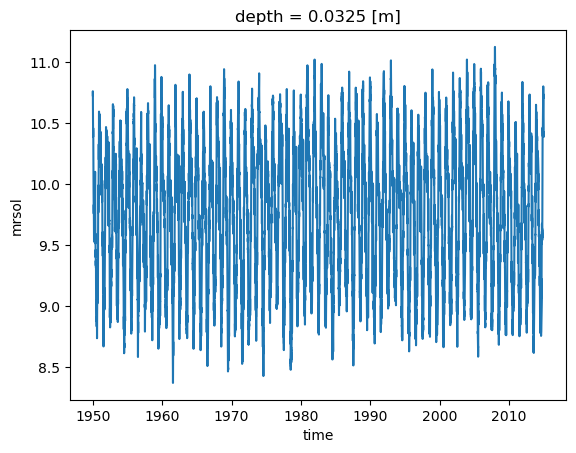

In [32]:
(day_mrso['mrsol'].isel(depth=0).mean(dim='i')).plot()

In [ ]:
#ok, I have day pp and mrso

cmip_pr = day_pp['pr'].mean('time')

In [ ]:

icon_smi = xr.where( (cmip_pr>=.1)&(ds['sftlf']>0.9), ds['mrso'], np.NaN)
icon_y1  = xr.where( (cmip_pr>=.1)&(ds['sftlf']>0.9), (ds['hflsd']*-1), np.NaN)
icon_y2  = xr.where( (icon_pr>=.1)&(ds['sftlf']>0.9), ds['hfssd'], np.NaN)

icon_corr_lh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds['pr'], icon_y1, dim='time'), np.NaN) #.values
icon_corr_sh_pr      = xr.where((icon_pr>=.1)&( ds['sftlf'] >0.9), 
                                xr.corr(ds['pr'], icon_y2, dim='time'), np.NaN) #.values